Problema de negócio: com dados históricos das vendas de 2023, é possível prever as vendas de 2024?

In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

### Pré-processamento e tratamento dos dados

In [3]:
# carregamento dos dados
df = pd.read_csv("dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


Sempre temos que convertar a data para índice, pois ela não será um dado a ser analisado, ela apenas demonstra o tempo do total de vendas. Transformamos a coluna para tipo data e depois colocamos como índice.

In [4]:
# converte a coluna para data
df['Data'] = pd.to_datetime(df['Data'])

In [5]:
# criar uma série temporal (transformando a data em index, ela não pode ser um campo)
series = df.set_index('Data')['Total_Vendas']
series.head()

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
Name: Total_Vendas, dtype: float64

In [6]:
# explicitar a frequência da série temporal
series = series.asfreq('D')  # dias

In [28]:
teste = series.resample("MS").mean()
teste

Data
2023-01-01    50.341517
2023-02-01    51.509158
2023-03-01    53.605199
2023-04-01    54.863131
2023-05-01    57.037586
2023-06-01    59.261858
2023-07-01    60.291703
2023-08-01    61.556809
2023-09-01    61.834062
2023-10-01    65.291677
2023-11-01    67.087855
2023-12-01    66.617075
Freq: MS, Name: Total_Vendas, dtype: float64

### Análise exploratória

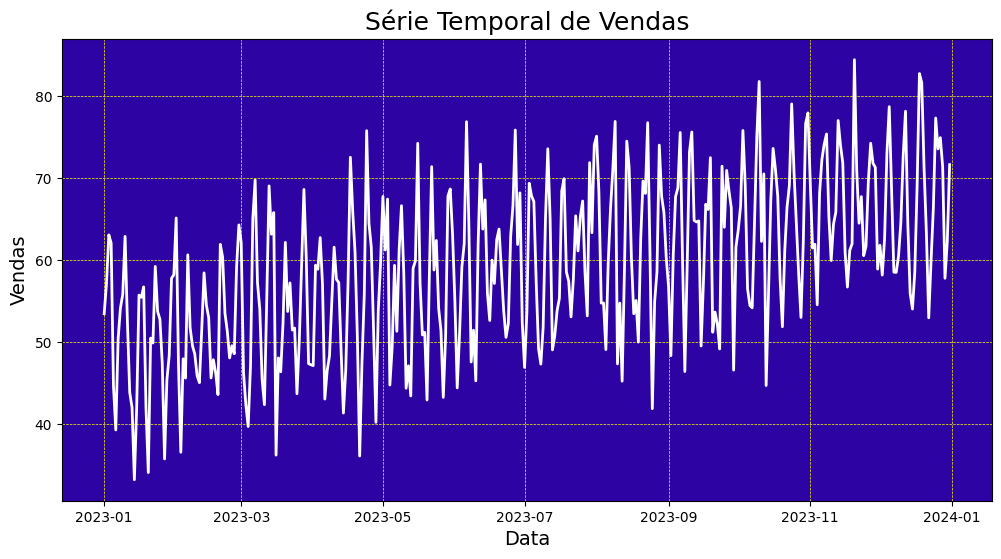

In [7]:
# gráfico

# Criar o gráfico da série temporal com layout de contraste
plt.figure(figsize = (12, 6))
plt.plot(series, color = 'white', linewidth = 2)

# Configurar cores e estilo do gráfico
plt.gca().set_facecolor('#2e03a3')
plt.grid(color = 'yellow', linestyle = '--', linewidth = 0.5)

# Configurar rótulos dos eixos, título e legenda
plt.xlabel('Data', color = 'black', fontsize = 14)
plt.ylabel('Vendas', color ='black', fontsize = 14)
plt.title('Série Temporal de Vendas', color = 'black', fontsize = 18)

# Configurar as cores dos eixos e dos ticks (marcadores)
plt.tick_params(axis = 'x', colors  = 'black')
plt.tick_params(axis = 'y', colors = 'black')

plt.show()

### Criação do modelo

In [8]:
# criação do modelo
model = SimpleExpSmoothing(series)

In [29]:
# treino do modelo
fit_model = model.fit(smoothing_level = 0.2)

c:\Users\leoci\workspace\code\python\classes\courses\dsa\venv\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [10]:
# valores de previsão histórica: retorna uma série temporal desconsiderando os erros e seguindo uma linha mais suave
values = fit_model.fittedvalues 

Text(0.5, 1.0, 'Valores reais x Previsão do modelo')

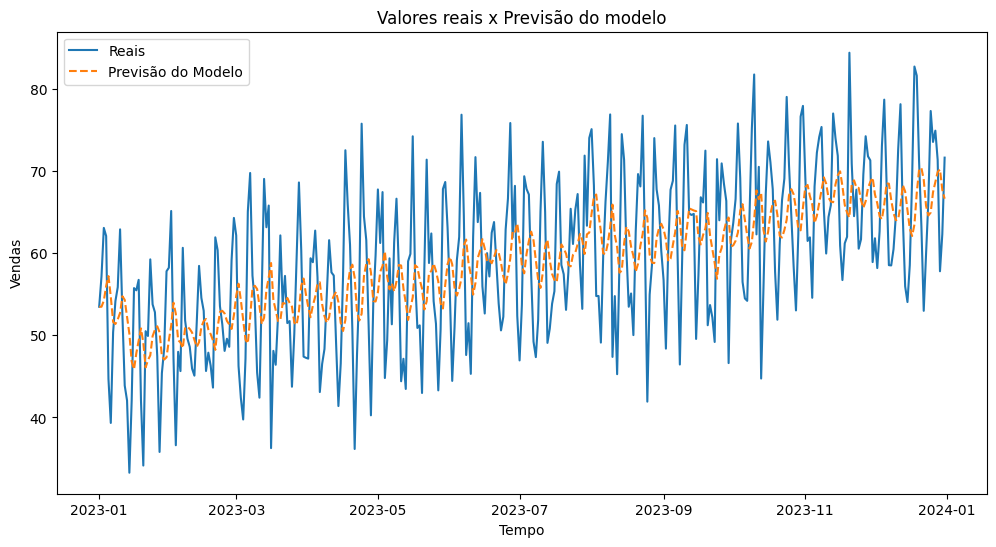

In [12]:
# gráfico
plt.figure(figsize=(12, 6))
plt.plot(series, label="Valores Reais")
plt.plot(values, label="Previsão do Modelo", linestyle="--")
plt.xlabel("Tempo")
plt.ylabel("Vendas")
plt.legend()
plt.title("Valores reais x Previsão do modelo")

### Deploy do modelo

In [43]:
# forecast (previsão do futuro com o modelo)
previsoes = fit_model.forecast(steps=1)

print("Previsões:")
print(f"Janeiro 2024: {round(previsoes.iloc[0], 4)}")

Previsões:
Janeiro 2024: 67.6499
